## Filter comparison

In [1]:
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import statistics as stats
import pandas as pd
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal
from scipy.signal import savgol_filter
from scipy.signal.signaltools import wiener

def highfilter(input_signal):
    #filtro: 'hp' high pass, 'low': low pass
    
    b, a = signal.butter(3, 0.05, 'hp') 
    y = signal.filtfilt(b, a, input_signal)
    
    return y

def lowfilter(input_signal):
    #filtro: 'hp' high pass, 'low': low pass
    
    b, a = signal.butter(3, 0.05, 'low') 
    y = signal.filtfilt(b, a, input_signal)
    
    return y

In [2]:
HA1 = sio.loadmat('H-A-1.mat')
Channel1 = HA1['Channel_1']
canal1 = Channel1.T[0]
t = np.linspace(0, 9, len(canal1))

Text(0.5, 1.0, 'Wiener filter')

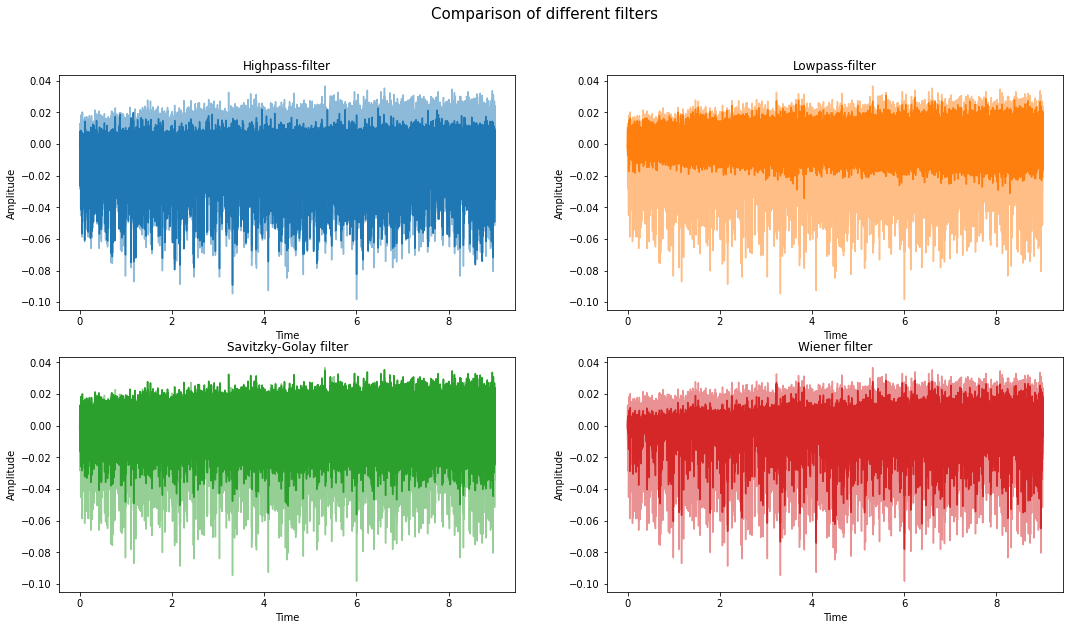

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(18,9.5)
fig.suptitle('Comparison of different filters', fontsize = 15)
ax1.plot(t, canal1, alpha = 0.5)
ax1.plot(t, highfilter(canal1), 'tab:blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.set_title('Highpass-filter')
ax2.plot(t, canal1, 'tab:orange', alpha = 0.5)
ax2.plot(t, lowfilter(canal1), 'tab:orange')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
ax2.set_title('Lowpass-filter')
ax3.plot(t, canal1, 'tab:green', alpha = 0.5)
ax3.plot(t, savgol_filter(canal1, 5, 2), 'tab:green')
ax3.set_xlabel('Time')
ax3.set_ylabel('Amplitude')
ax3.set_title('Savitzky-Golay filter')
ax4.plot(t, canal1, 'tab:red', alpha = 0.5)
filtered_img = wiener(canal1, 99)
ax4.plot(t, filtered_img, 'tab:red')
ax4.set_xlabel('Time')
ax4.set_ylabel('Amplitude')
ax4.set_title('Wiener filter')